In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/ml_WAICF/WAICF - Data Challenge_train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,accident_id,year,longitude,latitude,department,accident_type,road_category,address_nbr,traffic_type,speed_limitation,...,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country
0,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,NaN,...,1.0,0.0,1.0,2.0,7.0,1.0,NaN,1.0,2.0,A
1,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,NaN,...,1.0,0.0,1.0,2.0,2.0,15.0,NaN,1.0,2.0,A
2,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,NaN,...,1.0,0.0,1.0,1.0,7.0,1.0,NaN,1.0,2.0,A
3,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,NaN,...,1.0,0.0,1.0,1.0,2.0,15.0,NaN,1.0,2.0,A
4,x0160000000x,2016.0,0.0,0.0,590,2,3.0,39.0,1.0,NaN,...,1.0,6.0,1.0,1.0,7.0,1.0,NaN,16.0,3.0,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221218 entries, 0 to 2221217
Data columns (total 24 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   accident_id                         object 
 1   year                                float64
 2   longitude                           object 
 3   latitude                            object 
 4   department                          object 
 5   accident_type                       int64  
 6   road_category                       float64
 7   address_nbr                         object 
 8   traffic_type                        float64
 9   speed_limitation                    float64
 10  intersection                        float64
 11  pedestrian_localisation             float64
 12  light_condition                     float64
 13  weather_conditions                  float64
 14  road_condition                      float64
 15  obstacle_hit_type                   float64
 16  

missing val

In [ ]:
df.isna().sum()

accident_id                                0
year                                       0
longitude                             100464
latitude                              100464
department                                 0
accident_type                              0
road_category                              0
address_nbr                           164439
traffic_type                            3748
speed_limitation                      765961
intersection                               0
pedestrian_localisation               114209
light_condition                            0
weather_conditions                        55
road_condition                          4586
obstacle_hit_type                        630
person_type                           117964
person_sex                            117964
vehicule_type                          49773
principal_maneuver_before_accident     50122
vehicule_motor_type                   815648
day                                        0
month     

In [ ]:
import missingno as msno

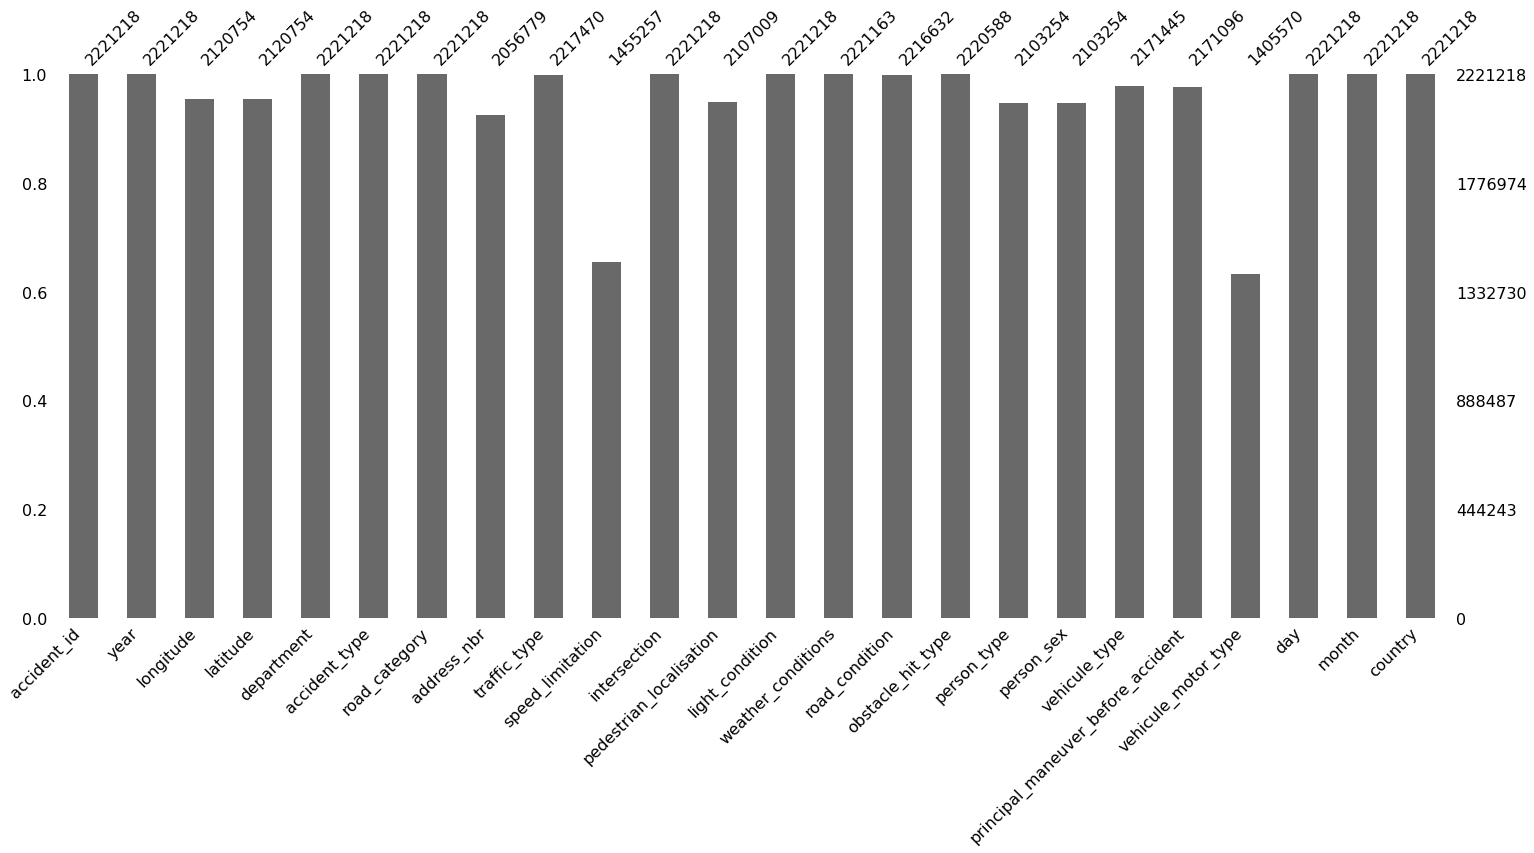

In [ ]:
msno.bar(df)

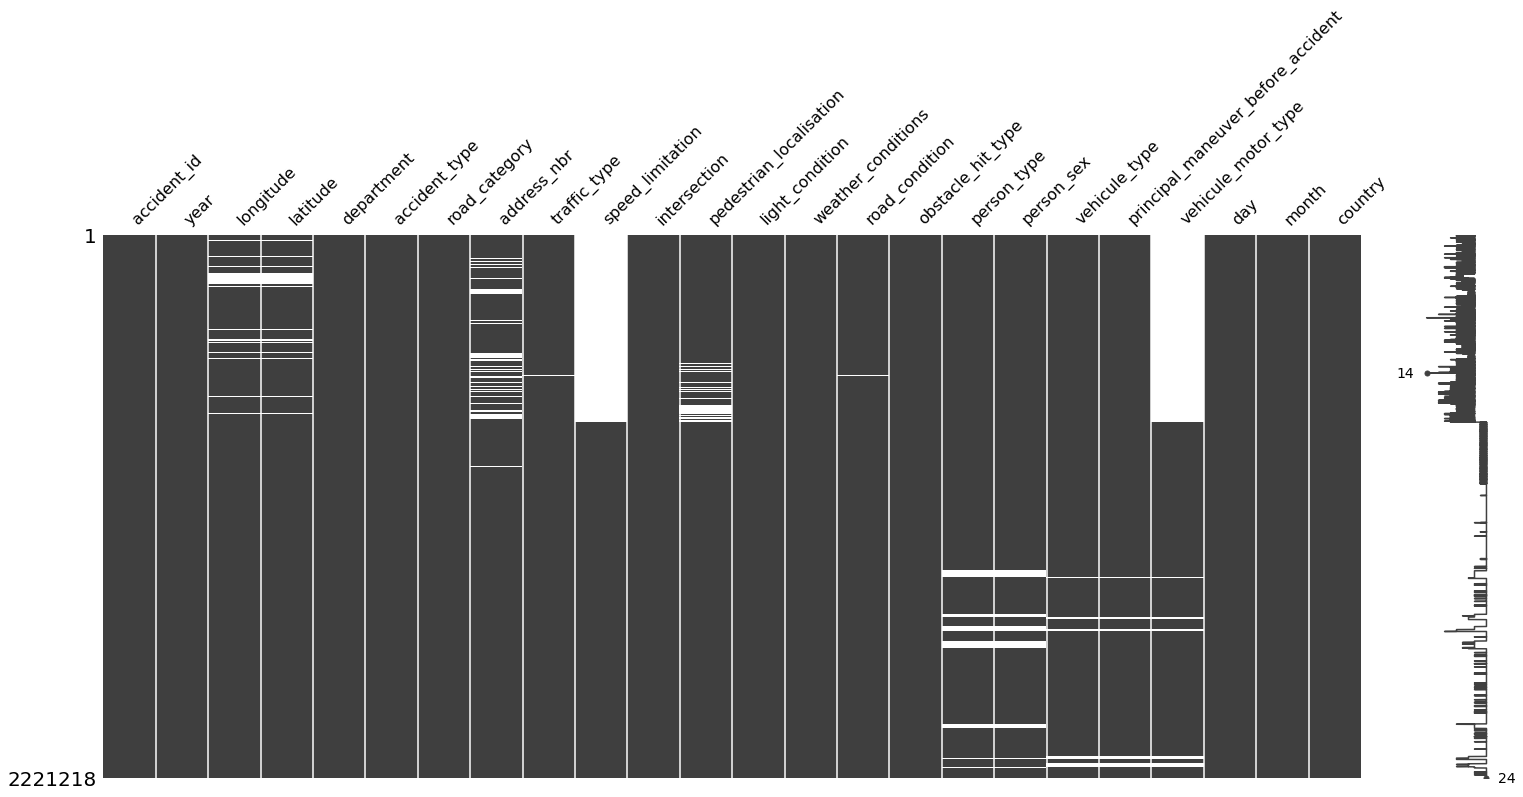

In [ ]:
msno.matrix(df)

**Correlation**

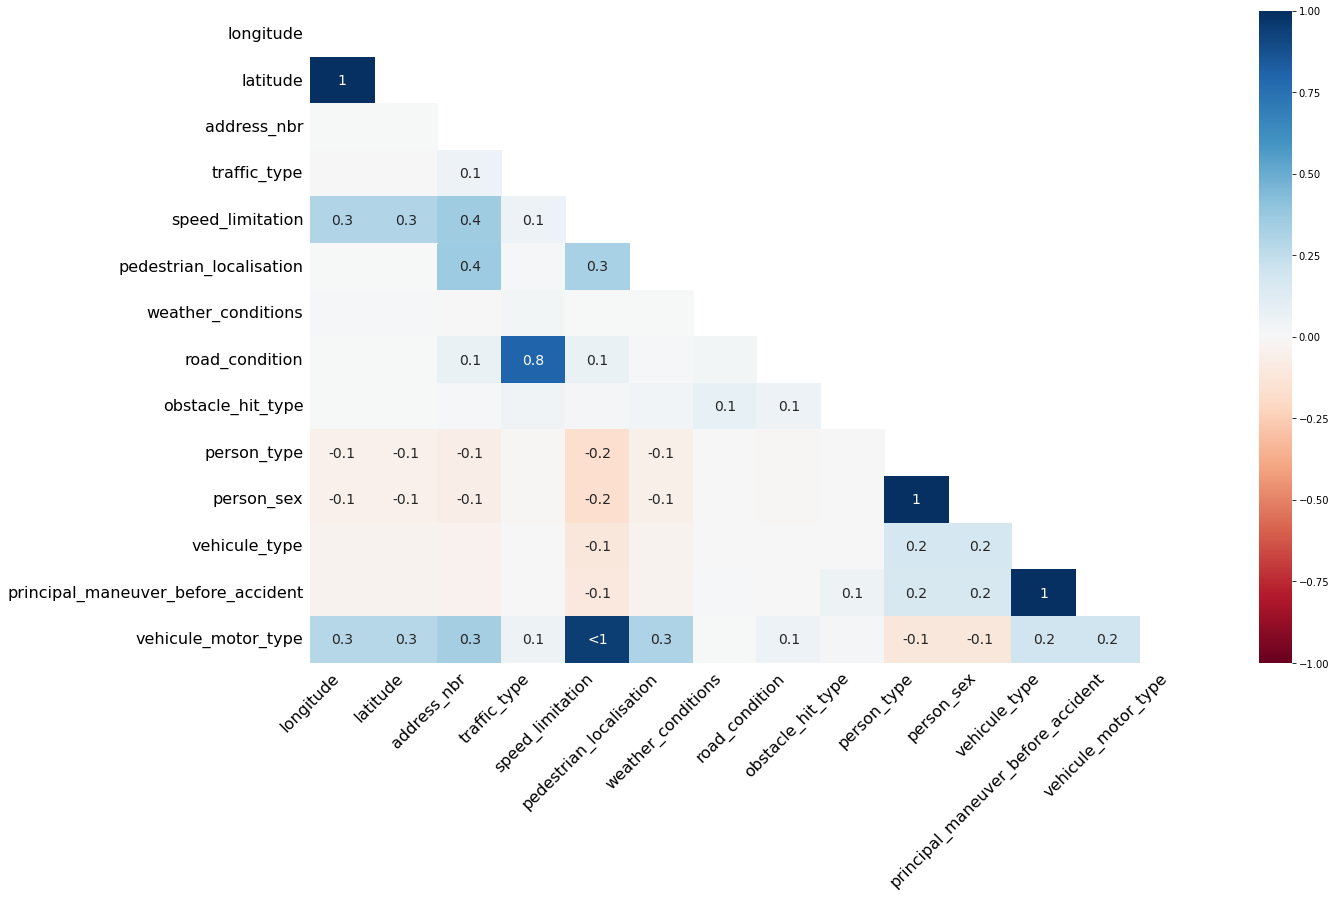

In [ ]:
msno.heatmap(df, labels = True)

Columns having missing values

In [ ]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['longitude',
 'latitude',
 'address_nbr',
 'traffic_type',
 'speed_limitation',
 'pedestrian_localisation',
 'weather_conditions',
 'road_condition',
 'obstacle_hit_type',
 'person_type',
 'person_sex',
 'vehicule_type',
 'principal_maneuver_before_accident',
 'vehicule_motor_type']

In [ ]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [ ]:
missing_percent = get_numerical_summary(df)

longitude : 100464 (4.523%)
latitude : 100464 (4.523%)
address_nbr : 164439 (7.403%)
traffic_type : 3748 (0.169%)
speed_limitation : 765961 (34.484%)
pedestrian_localisation : 114209 (5.142%)
weather_conditions : 55 (0.002%)
road_condition : 4586 (0.206%)
obstacle_hit_type : 630 (0.028%)
person_type : 117964 (5.311%)
person_sex : 117964 (5.311%)
vehicule_type : 49773 (2.241%)
principal_maneuver_before_accident : 50122 (2.257%)
vehicule_motor_type : 815648 (36.721%)


In [ ]:
cat_missing_cols = [col for col in missing_columns if df[col].dtype == 'object']
cat_missing_cols

['longitude', 'latitude', 'address_nbr']

**Handle Missing Data**

In [ ]:
missing_columns

['longitude',
 'latitude',
 'address_nbr',
 'traffic_type',
 'speed_limitation',
 'pedestrian_localisation',
 'weather_conditions',
 'road_condition',
 'obstacle_hit_type',
 'person_type',
 'person_sex',
 'vehicule_type',
 'principal_maneuver_before_accident',
 'vehicule_motor_type']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dr = DecisionTreeRegressor()

In [ ]:
df_temp = df.copy()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221218 entries, 0 to 2221217
Data columns (total 24 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   accident_id                         object 
 1   year                                float64
 2   longitude                           object 
 3   latitude                            object 
 4   department                          object 
 5   accident_type                       int64  
 6   road_category                       float64
 7   address_nbr                         object 
 8   traffic_type                        float64
 9   speed_limitation                    float64
 10  intersection                        float64
 11  pedestrian_localisation             float64
 12  light_condition                     float64
 13  weather_conditions                  float64
 14  road_condition                      float64
 15  obstacle_hit_type                   float64
 16  

Imputation transformer for completing missing values.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values= np.nan, strategy = "most_frequent")
imputer.fit(df_temp)
df_temp = imputer.transform(df_temp)

In [ ]:
df_temp

array([['x01600000001', 2016.0, 0.0, ..., 1.0, 2.0, 'A'],
       ['x01600000001', 2016.0, 0.0, ..., 1.0, 2.0, 'A'],
       ['x01600000001', 2016.0, 0.0, ..., 1.0, 2.0, 'A'],
       ...,
       ['x019984107x19', 2019.0, -3.274645, ..., 21.0, 6.0, 'B'],
       ['x019984107419', 2019.0, -2.997491, ..., 29.0, 6.0, 'B'],
       ['x01998QC01004', 2019.0, -3.715064, ..., 21.0, 4.0, 'B']],
      dtype=object)

In [ ]:
df_new = pd. DataFrame(df_temp, columns=['accident_id', 'year', 'longitude', 'latitude', 'department',
       'accident_type', 'road_category', 'address_nbr', 'traffic_type',
       'speed_limitation', 'intersection', 'pedestrian_localisation',
       'light_condition', 'weather_conditions', 'road_condition',
       'obstacle_hit_type', 'person_type', 'person_sex', 'vehicule_type',
       'principal_maneuver_before_accident', 'vehicule_motor_type', 'day',
       'month', 'country']) 

In [ ]:
df_new

,accident_id,year,longitude,latitude,department,accident_type,road_category,address_nbr,traffic_type,speed_limitation,...,road_condition,obstacle_hit_type,person_type,person_sex,vehicule_type,principal_maneuver_before_accident,vehicule_motor_type,day,month,country
0,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,30.0,...,1.0,0.0,1.0,2.0,7.0,1.0,1.0,1.0,2.0,A
1,x01600000001,2016.0,0.0,0.0,590,1,3.0,39.0,2.0,30.0,...,1.0,0.0,1.0,2.0,2.0,15.0,1.0,1.0,2.0,A
2,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,30.0,...,1.0,0.0,1.0,1.0,7.0,1.0,1.0,1.0,2.0,A
3,x01600000001,2016.0,0.0,0.0,590,2,3.0,39.0,2.0,30.0,...,1.0,0.0,1.0,1.0,2.0,15.0,1.0,1.0,2.0,A
4,x0160000000x,2016.0,0.0,0.0,590,2,3.0,39.0,1.0,30.0,...,1.0,6.0,1.0,1.0,7.0,1.0,1.0,16.0,3.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221213,x019984107019,2019.0,-2.983499,55.215407,98,1,3.0,7,6.0,60.0,...,2.0,0.0,1.0,1.0,19.0,18.0,2.0,30.0,5.0,B
2221214,x019984107x19,2019.0,-3.274645,54.991685,98,1,4.0,723,6.0,60.0,...,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,B
2221215,x019984107x19,2019.0,-3.274645,54.991685,98,1,4.0,723,6.0,60.0,...,1.0,0.0,1.0,1.0,9.0,18.0,2.0,21.0,6.0,B
2221216,x019984107419,2019.0,-2.997491,55.148292,98,1,6.0,0,6.0,30.0,...,1.0,0.0,3.0,1.0,9.0,7.0,2.0,29.0,6.0,B


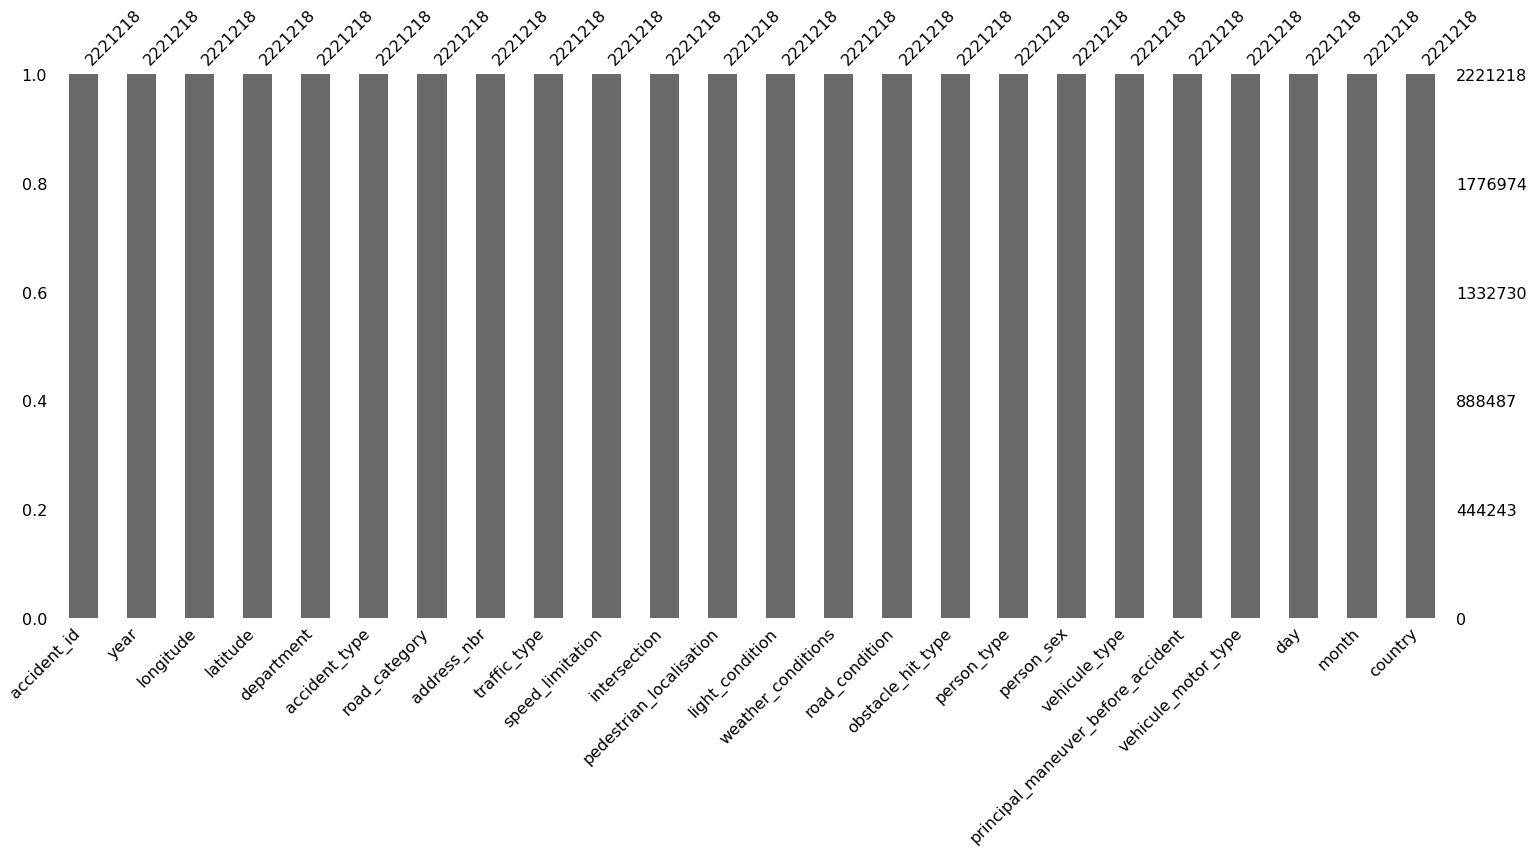

In [ ]:
msno.bar(df_new)

**model**

In [ ]:
df_new = df_new.drop("accident_id", axis=1)

In [ ]:
df_new["latitude"] = df_new["latitude"].astype(str)

In [ ]:
df_new['latitude'] = (df_new['latitude'].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

In [ ]:
df_new["longitude"] = df_new["longitude"].astype(str)

In [ ]:
df_new['longitude'] = (df_new['longitude'].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

In [ ]:
df_new = df_new.drop("address_nbr", axis=1)

In [ ]:
df_new = df_new.drop("department", axis=1)

In [ ]:
df_new['country'].replace(['A', 'B'], [0, 1], inplace=True)

In [ ]:
df_new = df_new.apply(pd.to_numeric) #, errors='ignore', errors='coerce'

In [ ]:
from sklearn.utils import shuffle
train_data = shuffle(df_new)

In [ ]:
from sklearn.model_selection import train_test_split
training_data , valid_data = train_test_split(train_data, test_size=0.2)

In [ ]:
X_train = train_data.drop(columns='accident_type')
y_train = train_data.accident_type
y_train = pd.DataFrame({'accident_type':y_train.values})
X_valid = valid_data.drop(columns='accident_type')
y_valid = valid_data.accident_type

In [ ]:
X_test_data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml_WAICF/WAICF - Data Challenge_test.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
X_train.shape, y_train.shape

((2221218, 20), (2221218, 1))

X_test modif

In [ ]:
X_test_data  = X_test_data.drop("accident_id", axis=1)

In [ ]:
id = pd.DataFrame(X_test_data['trustii_id'])

In [ ]:
X_test_data  = X_test_data.drop("department", axis=1)
X_test_data  = X_test_data.drop("address_nbr", axis=1)

In [ ]:
X_test_data["latitude"] = X_test_data["latitude"].astype(str)
X_test_data['latitude'] = (X_test_data['latitude'].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

X_test_data["longitude"] = X_test_data["longitude"].astype(str)
X_test_data['longitude'] = (X_test_data['longitude'].str.split()).apply(lambda x: float(x[0].replace(',', '.')))

X_test_data['country'].replace(['A', 'B'], [0, 1], inplace=True)

X_test_data = X_test_data.apply(pd.to_numeric)

handle nan

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values= np.nan, strategy = "most_frequent")
imputer.fit(X_test_data)
test_data = imputer.transform(X_test_data)

In [ ]:
X_test_data.columns

Index(['trustii_id', 'year', 'longitude', 'latitude', 'road_category',
       'traffic_type', 'speed_limitation', 'intersection',
       'pedestrian_localisation', 'light_condition', 'weather_conditions',
       'road_condition', 'obstacle_hit_type', 'person_type', 'person_sex',
       'vehicule_type', 'principal_maneuver_before_accident',
       'vehicule_motor_type', 'day', 'month', 'country'],
      dtype='object')

In [ ]:
X_test_data = pd. DataFrame(test_data, columns=['trustii_id','year', 'longitude', 'latitude', 'road_category', 'traffic_type',
       'speed_limitation', 'intersection', 'pedestrian_localisation',
       'light_condition', 'weather_conditions', 'road_condition',
       'obstacle_hit_type', 'person_type', 'person_sex', 'vehicule_type',
       'principal_maneuver_before_accident', 'vehicule_motor_type', 'day',
       'month', 'country']) 

In [ ]:
#X_test_data = pd.concat([id, X_test_data], axis=1)

In [ ]:
X_test  = X_test_data.set_index("trustii_id")

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model = logreg.fit(X_train , y_train)
Y_pred = model.predict(X_valid)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
for i in range(len(Y_pred)):
    if(Y_pred[i]>0.5):
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0

In [ ]:
Y_pred = Y_pred.astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred, y_valid)

0.8071420210514942

submission

In [ ]:
sub = model.predict(X_test)

In [ ]:
for i in range(len(sub)):
    if(sub[i]>0.5):
        sub[i] = 1
    else:
        sub[i] = 0

In [ ]:
sub = sub.astype(int)

In [ ]:
sub

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X_test_data['accident_type'] = sub
X_test_data.to_csv('my_submission.csv')#, index=False, columns=True, encoding='UTF-8'

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train , y_train)
Y_pred = random_forest.predict(X_valid)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


96.73

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_valid)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

96.73

Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_valid)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


23.3